In [8]:
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Axes: >

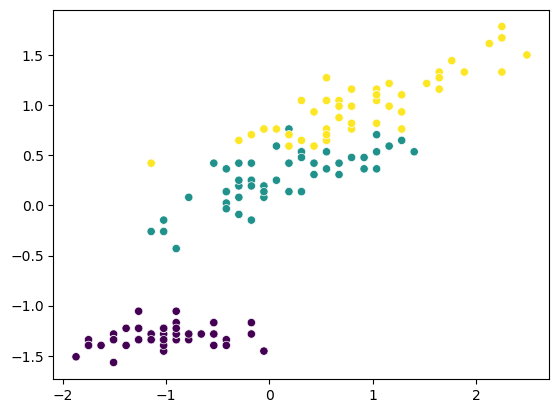

In [11]:
# visualize
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 2], c=y)

In [12]:
# DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps = 0.8,
    min_samples = 5
)

In [13]:
labels = dbscan.fit_predict(X_scaled)

<Axes: >

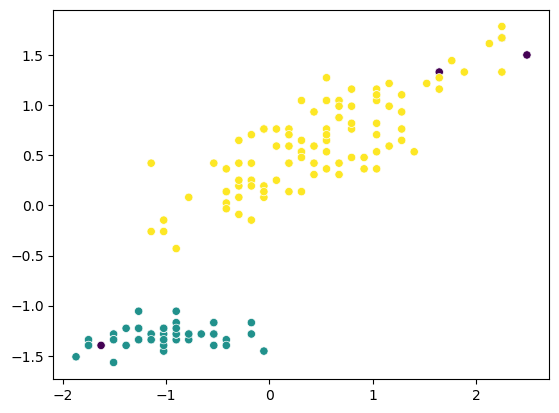

In [15]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 2], c=labels)

In [16]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### in labels
- `0` : 1st Cluster
- `1` : 2nd Cluster
- **`-1`** : Noise (Outliers)

### Anomalies Detection
- by the help of **DBSCAN** we can easily detect **Anomalies**

---

## Non-Linear Data 
- we use **make_moons** for non-linear datasets
- **`make_moons`** :- A simple toy dataset to visualize clustering and classification algorithms (Make two interleaving half circles).

sklearn.datasets.**make_moons**(
    n_samples=100, *, shuffle=True, noise=None, random_state=None
)

In [18]:
from sklearn.datasets import make_moons

In [19]:
X, y = make_moons(
    n_samples=300,
    noise=0.05,
    random_state=42
)

<Axes: >

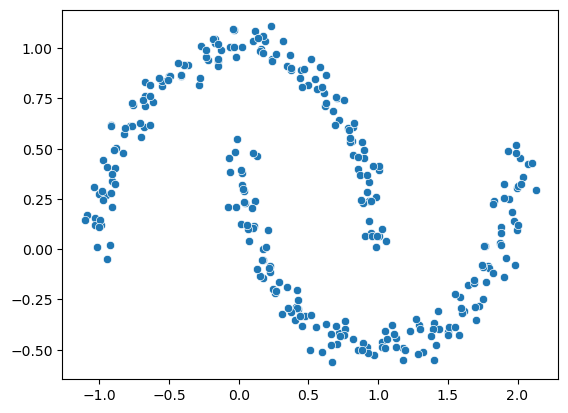

In [22]:
X_scaled = scaler.fit_transform(X)

sns.scatterplot(x=X[:,0], y=X[:,1])

### KMeans vs DBSCAN
- Now we check both performance on **Non-Linear Data**

In [24]:
# K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=2,
    random_state=42
)

labels = kmeans.fit_predict(X_scaled)

C:\Users\ranja\anaconda3\envs\ml\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


<Axes: >

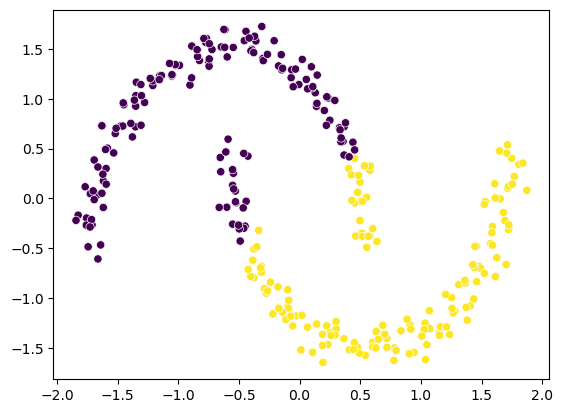

In [25]:
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], c=labels)

In [26]:
# DBSCAN

dbscan = DBSCAN(
    eps=0.5,
    min_samples=5
)

labels = dbscan.fit_predict(X_scaled)

<Axes: >

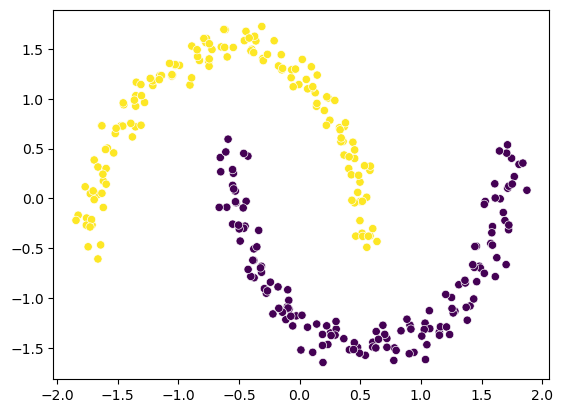

In [28]:
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], c=labels)

### WE can see:
- that **DBSCAN** do better(perfect) clustering compare to **KMeans** on **Non-Linear Data**
- DBSCAN is very well to indentify this type of patterns
- and also its popular use case is: **Anomalies Detection**